# Analyzing predictions of transformer based detector

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
!pip install seaborn
!pip install scikit-learn
from sklearn.model_selection import train_test_split


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
transformer_data = pd.read_csv("szakdolgozat_detector.csv", sep=";", encoding='cp1252', index_col=0)
clean = pd.read_csv('clean_data.csv').set_index('Unnamed: 0')

In [3]:
len(clean)

12800

In [5]:
# Train-test split
X_train_texts, X_test_texts, y_train, y_test = train_test_split(
    clean['clean_text'], clean['label'], test_size=0.2, random_state=15, stratify=clean['label'])

In [6]:
# Get test rows in the new DataFrame
transformer_test = transformer_data.loc[X_test_texts.index]
transformer_train = transformer_data.drop(X_test_texts.index)

In [18]:
transformer_test['predicted_class'] = transformer_test.apply(lambda x: 0 if x.ai_probability < 0.5 else 1, axis=1)
transformer_test['accurate'] = transformer_test.apply(lambda x: True if int(x.label) == x.predicted_class else False, axis=1)

In [19]:
transformer_test.accurate.value_counts(normalize=True)

accurate
True     0.828516
False    0.171484
Name: proportion, dtype: float64

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.66      0.79      1280
           1       0.75      1.00      0.85      1280

    accuracy                           0.83      2560
   macro avg       0.87      0.83      0.82      2560
weighted avg       0.87      0.83      0.82      2560



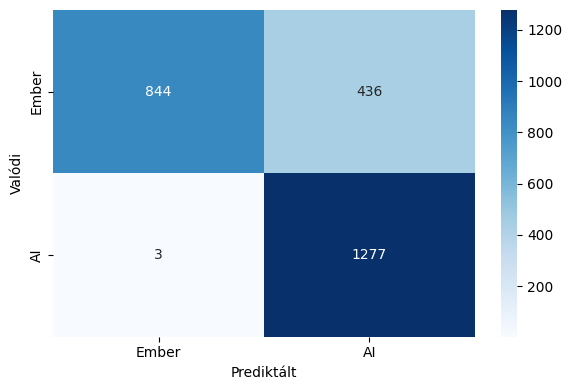

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# True and predicted labels
y_true = transformer_test['label']
y_pred = transformer_test['predicted_class']

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Ember', 'AI']  # Or just [0, 1] if you prefer raw labels

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Prediktált')
plt.ylabel('Valódi')
plt.title('')
plt.tight_layout()
plt.show()

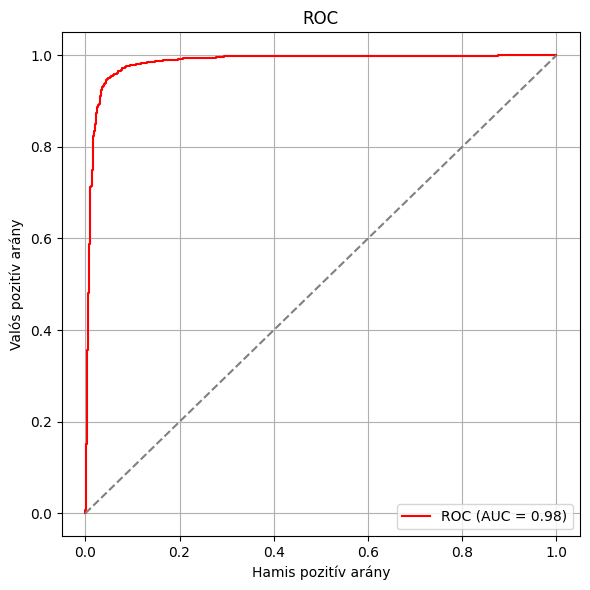

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_true = transformer_test['label']
y_scores = transformer_test['ai_probability']

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal baseline
plt.xlabel('Hamis pozitív arány')
plt.ylabel('Valós pozitív arány')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

X_train_small, X_val_texts, y_train_small, y_val = train_test_split(
    X_train_texts, y_train, test_size=0.2, random_state=42, stratify=y_train
)
transformer_val = transformer_train.loc[X_val_texts.index]


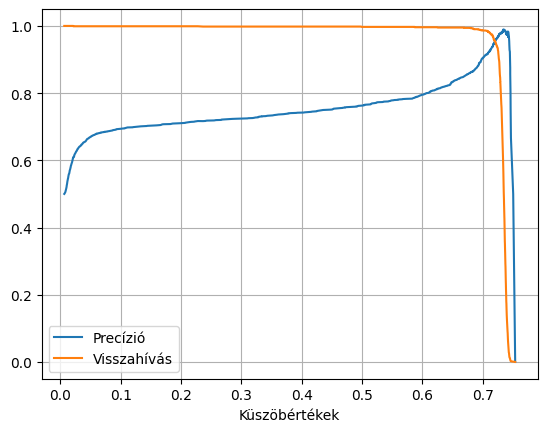

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(
    transformer_val["label"], transformer_val["ai_probability"]
)

plt.plot(thresholds, precision[:-1], label="Precízió")
plt.plot(thresholds, recall[:-1], label="Visszahívás")
plt.xlabel("Küszöbértékek")  # Thresholds
#plt.ylabel("Értékek")       # Values (optional)
#plt.title("Precision-Recall görbe (validációs halmaz)")  # PR Curve (Validation Set)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import f1_score

# Try different thresholds
thresholds = np.arange(0.0, 1.01, 0.01)

f1_scores = [f1_score(y_true, y_scores >= t) for t in thresholds]

accuracy_scores = [accuracy_score(y_true, y_scores >= t) for t in thresholds]

# Best threshold by F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]
print(f"Best threshold (by F1): {best_threshold_f1:.2f}")


best_threshold_acc = thresholds[np.argmax(accuracy_scores)]
print(f"Best threshold (by Acc): {best_threshold_acc:.2f}")


Best threshold (by F1): 0.72
Best threshold (by Acc): 0.72


In [20]:
transformer_test['predicted_class_new_treshold'] = transformer_test.apply(lambda x: 0 if x.ai_probability < 0.72 else 1, axis=1)
transformer_test['accurate_new_threshold'] = transformer_test.apply(lambda x: True if int(x.label) == x.predicted_class else False, axis=1)

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1280
           1       0.95      0.95      0.95      1280

    accuracy                           0.95      2560
   macro avg       0.95      0.95      0.95      2560
weighted avg       0.95      0.95      0.95      2560



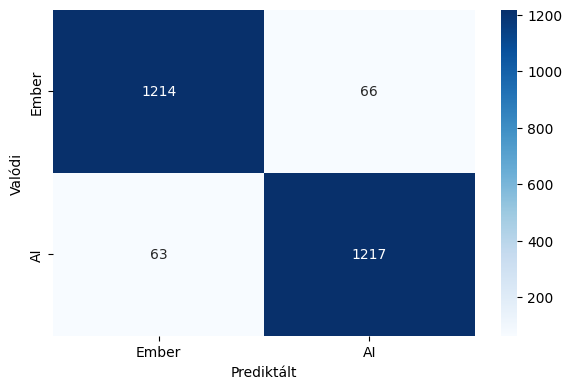

In [28]:
# True and predicted labels
y_true = transformer_test['label']
y_pred = transformer_test['predicted_class_new_treshold']

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Ember', 'AI']  # Or just [0, 1] if you prefer raw labels

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Prediktált')
plt.ylabel('Valódi')
plt.title('')
plt.tight_layout()
plt.show()